<module 'datetime' from 'C:\\Users\\adamo\\anaconda3\\lib\\datetime.py'>
<module 'pandas' from 'C:\\Users\\adamo\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>
<module 'matplotlib.pyplot' from 'C:\\Users\\adamo\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>
<module 'pandas_datareader.data' from 'C:\\Users\\adamo\\anaconda3\\lib\\site-packages\\pandas_datareader\\data.py'>
<module 'matplotlib.ticker' from 'C:\\Users\\adamo\\anaconda3\\lib\\site-packages\\matplotlib\\ticker.py'>
                 High        Low       Open      Close    Volume  Adj Close  \
Date                                                                          
2020-05-11  55.889999  52.750000  52.900002  55.740002  68574000  55.740002   
2020-05-12  56.580002  53.750000  56.209999  53.759998  55631100  53.759998   
2020-05-13  55.220001  51.299999  54.040001  52.180000  76824700  52.180000   
2020-05-14  54.540001  51.610001  52.099998  54.509998  73814000  54.509998   
2020-05-15  54.439999  52.86

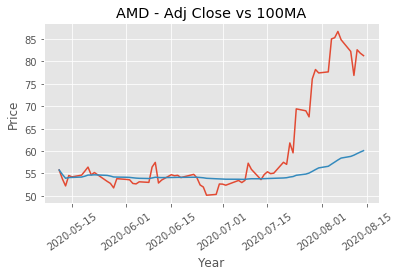

In [31]:

#Ademola Adam Asimolowo

import datetime as date
import matplotlib.pyplot as plotter #this import allows us to plot/make graphs
from matplotlib import style #this allows us to style the graphs
import pandas as pd #very popular data analysis library
import pandas_datareader.data as datareader #reads data from api
import matplotlib.ticker as ticker

print(date)
print(pd)
print(plotter)
print(datareader)
print(ticker)

#Adj Close vs 100 MA Technical Anaylsis Algorithm

def get_data(ticker, api):

    start_date = date.datetime(2020, 5, 9) #starting date for our stock analysis. where we start our analysis
    end_date = date.datetime(2020, 8, 14) #end date for our stock anaylsis. where we end our analysis
    df = datareader.DataReader(ticker, api, start_date, end_date)
    
    return df

def adj_close_100ma_algo(ticker):
    datafrme = get_data('AMD', 'yahoo')
    datafrme['100MA'] = datafrme["Adj Close"].rolling(window = 100, min_periods = 0).mean() 
    print(datafrme.tail(100))
    
    #setting up graph
    ax1 = plotter.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1) #6 by 1 so 6 rows 1 column, starting point (0,0)

    ax1.set_title(ticker + " - Adj Close vs 100MA")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Price")
    ax1.plot(datafrme.index, datafrme['Adj Close'])#ax1.plot(x, y) so ax1.plot(df.index(the date), df['Adj Close']#the price or y axis)
    ax1.plot(datafrme.index, datafrme['100MA'])
    plotter.xticks(rotation=35)
    
    #KEY FOR GRAPH
    #BLUE = 100MA RED = ADJ CLOSE
    
    print(df.head())

    bullish_days = 0
    bearish_days = 0
    no_signal = 0

    for i in datafrme.index:
        #print("Adj Close: " + str(df.iloc[:, 5][i]))#prints out the volume for each date
        #print("100 MA: " + str(df.iloc[:, 6][i]))

        if datafrme.iloc[:, 5][i] > datafrme.iloc[:, 6][i]:
            bullish_days += 1
            #print("Bullish signature")
        elif datafrme.iloc[:, 5][i] == datafrme.iloc[:,6][i]:
            no_signal += 1
            #print(str(i) + "100 MA and Adj Close equal to each other, no signal")
        else:
            bearish_days += 1
            #print("Bearish signature")

    print(""), print("           -----PRICE VS 100 MA ANALYSIS-----")
    print("Bullish Days: " + str(bullish_days) + "\nBearish Days: " + str(bearish_days) + "\nNo Signal Days: " + str(no_signal)+ "\n\n")
    if bullish_days > bearish_days:
        print("Technical Mid-Term Signal: Bullish on " + ticker + " from a Technical standpoint")
    else:
        print("Technical Mid-Term Signal: Bearish on " + ticker+ " from a Technical standpoint")


    
adj_close_100ma_algo('AMD')
    
    

